# EXPLORATORY DATA ANALYSIS
Company X is expanding in to new industries to diversify its portfolio. They are particularly interested in purchasing and operating airplanes for commercial and private enterprises. However, they do not have enough knowledge on the potential risks of aircrafts.



**Task**

- Determine which aircraft are the lowest risk for the company X to start this new endeavor.
- Translate findings into actionable insights that the stake holders can use to help decide which aircraft to purchase.


## The Data
The data is from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters. The dataset was obtained from Kaggle. https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses


## Loading the Data¶

In [1]:
# import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_excel("AviationData.xlsx")
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaT
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,1996-09-19
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,2007-02-26
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,2000-09-12
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,1980-04-16


## Exploring the Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Investigation.Type      88889 non-null  object        
 2   Accident.Number         88889 non-null  object        
 3   Event.Date              88889 non-null  datetime64[ns]
 4   Location                88837 non-null  object        
 5   Country                 88663 non-null  object        
 6   Latitude                34382 non-null  object        
 7   Longitude               34373 non-null  object        
 8   Airport.Code            50132 non-null  object        
 9   Airport.Name            52704 non-null  object        
 10  Injury.Severity         87889 non-null  object        
 11  Aircraft.damage         85695 non-null  object        
 12  Aircraft.Category       32287 non-null  object

In [4]:
# get the number of missing values
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

## Data Cleaning

In [5]:
relevant_columns = [
    'Investigation.Type',
    'Event.Date',
    'Country',
    'Injury.Severity',
    'Aircraft.damage',
    'Make',
    'Model',
    'Amateur.Built',
    'Number.of.Engines',
    'Engine.Type',
    'Purpose.of.flight',
    'Total.Fatal.Injuries',
    'Total.Serious.Injuries',
    'Total.Minor.Injuries',
    'Total.Uninjured',
    'Weather.Condition',
    
]

In [6]:
df_new = df.loc[:,relevant_columns]
df_new.shape

(88889, 16)

In [153]:
# change some column titles to more managable ones
new_column_names = { 'Investigation.Type': 'Investigation_Type', 'Event.Date':'Event_Date', 'Injury.Severity':'Injury_Severity', 
                    'Aircraft.damage':'Aircraft_damage', 'Number.of.Engines':'Number_of_Engines','Engine.Type':'Engine_Type', 'Purpose.of.flight':'Flight_Purpose',
                    'Total.Fatal.Injuries':'Fatal_Injuries', 'Total.Serious.Injuries':'Serious_Injuries',
                   'Total.Minor.Injuries':'Minor_Injuries', 'Total.Uninjured':'Uninjured', 'Weather.Condition':'Weather',}
df_new.rename(columns=new_column_names, inplace=True)

In [154]:
df_new.head()

,Investigation_Type,Event_Date,Country,Injury_Severity,Aircraft_damage,Make,Model,Amateur.Built,Number_of_Engines,Engine_Type,Flight_Purpose,Fatal_Injuries,Serious_Injuries,Minor_Injuries,Uninjured,Weather
0,Accident,1948-10-24,United States,Fatal(2),Destroyed,stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK
1,Accident,1962-07-19,United States,Fatal(4),Destroyed,piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK
2,Accident,1974-08-30,United States,Fatal(3),Destroyed,cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC
3,Accident,1977-06-19,United States,Fatal(2),Destroyed,rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC
4,Accident,1979-08-02,United States,Fatal(1),Destroyed,cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC


In [9]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Investigation_Type  88889 non-null  object        
 1   Event_Date          88889 non-null  datetime64[ns]
 2   Country             88663 non-null  object        
 3   Injury_Severity     87889 non-null  object        
 4   Aircraft_damage     85695 non-null  object        
 5   Make                88826 non-null  object        
 6   Model               88797 non-null  object        
 7   Amateur.Built       88787 non-null  object        
 8   Number_of_Engines   82805 non-null  float64       
 9   Engine.Type         81793 non-null  object        
 10  Flight_Purpose      82697 non-null  object        
 11  Fatal_Injuries      77488 non-null  float64       
 12  Serious_Injuries    76379 non-null  float64       
 13  Minor_Injuries      76956 non-null  float64   

In [121]:
df_new['Investigation_Type'].value_counts()

Investigation_Type
Accident    74524
Incident      549
Name: count, dtype: int64

In [122]:
df_new['Investigation_Type'].isna().sum()

0

In [10]:
# I subset the data to determine the Make and Model that has been involved in many Accidents
# Handling the missing data in Make and Model

df_new.Make.value_counts()

Make
Cessna             22227
Piper              12029
CESSNA              4922
Beech               4330
PIPER               2841
                   ...  
Leonard Walters        1
Maule Air Inc.         1
Motley Vans            1
Perlick                1
ROYSE RALPH L          1
Name: count, Length: 8237, dtype: int64

Here, we realize that Cessna and CESSNA are taken as different rows despite being the same thing. change the case to lower

In [11]:
df_new['Make'] = df_new['Make'].str.lower()

In [12]:
df_new['Make'].isna().sum()

67

In [13]:
df_new= df_new[df_new['Make'].notna()]

In [14]:
df_new.Make.value_counts()

Make
cessna                   27149
piper                    14870
beech                     5372
boeing                    2745
bell                      2722
                         ...  
boykin b j                   1
bensen aircraft corp.        1
steen aero lab               1
cap                          1
royse ralph l                1
Name: count, Length: 7584, dtype: int64

now the unique values are populated correctly. 

In [15]:
# Model
df_new.Model.value_counts()

Model
152             2367
172             1756
172N            1164
PA-28-140        932
150              829
                ... 
747-2R7F           1
GC-1-A             1
737-3S3            1
MBB-BK117-B2       1
M-8 EAGLE          1
Name: count, Length: 12306, dtype: int64

In [16]:
df_new['Model'].isna().sum()

49

In [17]:
# convert to str 
df_new['Model'] = df_new['Model'].astype(str)
df_new['Model'].info()

<class 'pandas.core.series.Series'>
Index: 88822 entries, 0 to 88888
Series name: Model
Non-Null Count  Dtype 
--------------  ----- 
88822 non-null  object
dtypes: object(1)
memory usage: 1.4+ MB


In [18]:
# drop Missing rows
df_new = df_new[~df_new['Model'].isin(['UNKNOWN'])]
df_new = df_new[df_new['Model'].notna()]

## Visualizations

### Lets investigate the make and Model distribution 

In [125]:
# lets groups these two with accidents and plot a barchart
make_model = df_new.groupby(['Make', 'Model','Investigation_Type'], sort=False).size().reset_index(name='AccidentCount')
make_model = make_model[make_model['Investigation_Type'] == 'Accident']
make_model

,Make,Model,Investigation_Type,AccidentCount
0,stinson,108-3,Accident,97
1,piper,PA24-180,Accident,4
2,cessna,172M,Accident,764
3,rockwell,112,Accident,7
4,cessna,501,Accident,21
...,...,...,...,...
16023,greg hobbs,LIGHTNING,Accident,1
16024,rotorsport uk ltd,CAVALON,Accident,1
16025,james r dernovsek,KITFOX S5,Accident,1
16026,orlican s r o,M-8 EAGLE,Accident,1


In [126]:
make_model = make_model.sort_values(by='AccidentCount', ascending=False)
make_model


,Make,Model,Investigation_Type,AccidentCount
18,cessna,152,Accident,2300
16,cessna,172,Accident,1624
42,cessna,172N,Accident,1123
40,piper,PA-28-140,Accident,914
62,cessna,150,Accident,782
...,...,...,...,...
6982,kaas,EXPRESS,Accident,1
6983,bennett,M-500A,Accident,1
6984,maule,MXT-7-108A,Accident,1
6985,star-lite engineering ltd,WARP 1A,Accident,1


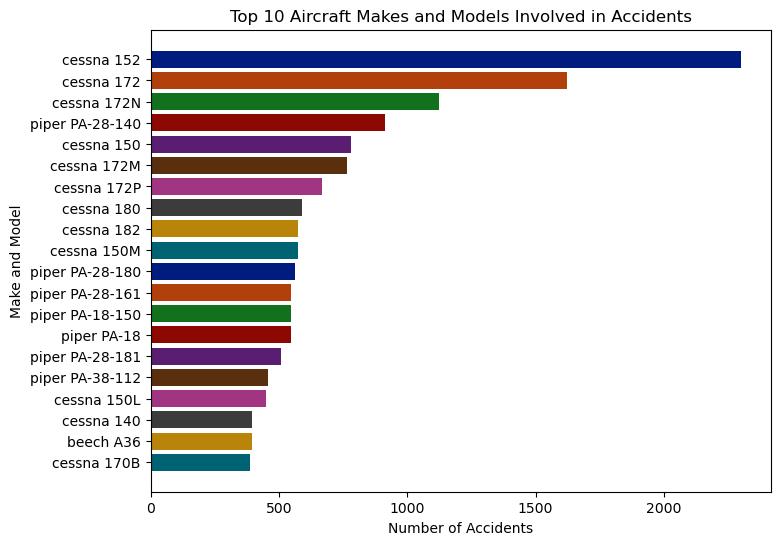

In [127]:
# plotting the top 10 make and model 

fig, ax = plt.subplots(figsize=(8,6))

colors = sns.color_palette("dark", len(make_model))

ax.barh(make_model['Make'][:20] + ' ' +make_model['Model'][:20], make_model['AccidentCount'][:20], color=colors)
ax.set_xlabel('Number of Accidents')
ax.set_ylabel('Make and Model')
ax.set_title('Top 10 Aircraft Makes and Models Involved in Accidents')
ax.invert_yaxis();

Cessna had been involved in many accidents, followed by PIPER.

Cessna Model 152 has most accidents.

### Lets investigate the flight purpose and Make Model that have had many accidents

In [128]:
# Flight purpose cleaning
df_new['Flight_Purpose'].isna().sum()

0

In [129]:
# Remove null values
df_new = df_new[df_new['Flight_Purpose'].notna()]
df_new = df_new[~df_new['Flight_Purpose'].isin(['Unknown'])]

In [130]:
df_new['Flight_Purpose'].value_counts()

Flight_Purpose
Personal                     49038
Instructional                10517
Aerial Application            4697
Business                      3923
Positioning                   1603
Other Work Use                1206
Ferry                          805
Aerial Observation             773
Public Aircraft                707
Executive/corporate            523
Flight Test                    396
Skydiving                      178
External Load                  115
Public Aircraft - Federal      102
Banner Tow                     101
Air Race show                   90
Public Aircraft - Local         69
Public Aircraft - State         61
Air Race/show                   56
Glider Tow                      53
Firefighting                    38
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: count, dtype: int64

Unknown will be taken as Missing values

In [132]:
make_model_flight = df_new.groupby(['Make', 'Model','Flight_Purpose']).size().reset_index(name='Count')
make_model_flight.head()


,Make,Model,Flight_Purpose,Count
0,107.5 flying corporation,One Design DR 107,Personal,1
1,177mf llc,PITTS MODEL 12,Personal,1
2,1977 colfer-chan,STEEN SKYBOLT,Personal,1
3,1st ftr gp,FOCKE-WULF 190,Personal,1
4,2000 mccoy,Genesis,Flight Test,1


In [133]:
# Create a column combining Make and Model
make_model_flight['Make_Model'] = make_model_flight['Make'] + ' ' + make_model_flight['Model']

In [134]:
# Pivot the data for plotting
make_model_flight_pivot = make_model_flight.pivot(index='Make_Model', columns='Flight_Purpose', values='Count').fillna(0)

In [135]:
# Calculate total count for each flight purpose
count_flight_purpose = make_model_flight_pivot.sum(axis=0)
count_flight_purpose

Flight_Purpose
ASHO                             6.0
Aerial Application            4697.0
Aerial Observation             773.0
Air Drop                        11.0
Air Race show                   90.0
Air Race/show                   56.0
Banner Tow                     101.0
Business                      3923.0
Executive/corporate            523.0
External Load                  115.0
Ferry                          805.0
Firefighting                    38.0
Flight Test                    396.0
Glider Tow                      53.0
Instructional                10517.0
Other Work Use                1206.0
PUBL                             1.0
PUBS                             4.0
Personal                     49038.0
Positioning                   1603.0
Public Aircraft                707.0
Public Aircraft - Federal      102.0
Public Aircraft - Local         69.0
Public Aircraft - State         61.0
Skydiving                      178.0
dtype: float64

In [136]:
# Select top 10 flight purposes
top_flight_purposes = count_flight_purpose.nlargest(5).index
top_flight_purposes

Index(['Personal', 'Instructional', 'Aerial Application', 'Business',
       'Positioning'],
      dtype='object', name='Flight_Purpose')

In [137]:
# Filter the pivoted data to only include the top 10 flight purposes
make_model_flight_pivot_top = make_model_flight_pivot[top_flight_purposes]
make_model_flight_pivot_top

Flight_Purpose,Personal,Instructional,Aerial Application,Business,Positioning
Make_Model,,,,,
107.5 flying corporation One Design DR 107,1.0,0.0,0.0,0.0,0.0
177mf llc PITTS MODEL 12,1.0,0.0,0.0,0.0,0.0
1977 colfer-chan STEEN SKYBOLT,1.0,0.0,0.0,0.0,0.0
1st ftr gp FOCKE-WULF 190,1.0,0.0,0.0,0.0,0.0
2000 mccoy Genesis,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
zubair s khan RAVEN,1.0,0.0,0.0,0.0,0.0
zuber thomas p ZUBER SUPER DRIFTER,1.0,0.0,0.0,0.0,0.0
zukowski EAA BIPLANE,1.0,0.0,0.0,0.0,0.0


In [138]:
# Sorting by the total count
make_model_flight_pivot_top['Total'] = make_model_flight_pivot_top.sum(axis=1)
make_model_flight_pivot_top


C:\Users\ericm\AppData\Local\Temp\ipykernel_4896\1467054139.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  make_model_flight_pivot_top['Total'] = make_model_flight_pivot_top.sum(axis=1)


Flight_Purpose,Personal,Instructional,Aerial Application,Business,Positioning,Total
Make_Model,,,,,,
107.5 flying corporation One Design DR 107,1.0,0.0,0.0,0.0,0.0,1.0
177mf llc PITTS MODEL 12,1.0,0.0,0.0,0.0,0.0,1.0
1977 colfer-chan STEEN SKYBOLT,1.0,0.0,0.0,0.0,0.0,1.0
1st ftr gp FOCKE-WULF 190,1.0,0.0,0.0,0.0,0.0,1.0
2000 mccoy Genesis,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
zubair s khan RAVEN,1.0,0.0,0.0,0.0,0.0,1.0
zuber thomas p ZUBER SUPER DRIFTER,1.0,0.0,0.0,0.0,0.0,1.0
zukowski EAA BIPLANE,1.0,0.0,0.0,0.0,0.0,1.0


In [139]:
# sort values by total 
make_model_flight_pivot_top = make_model_flight_pivot_top.sort_values(by='Total', ascending=False).drop(columns='Total')

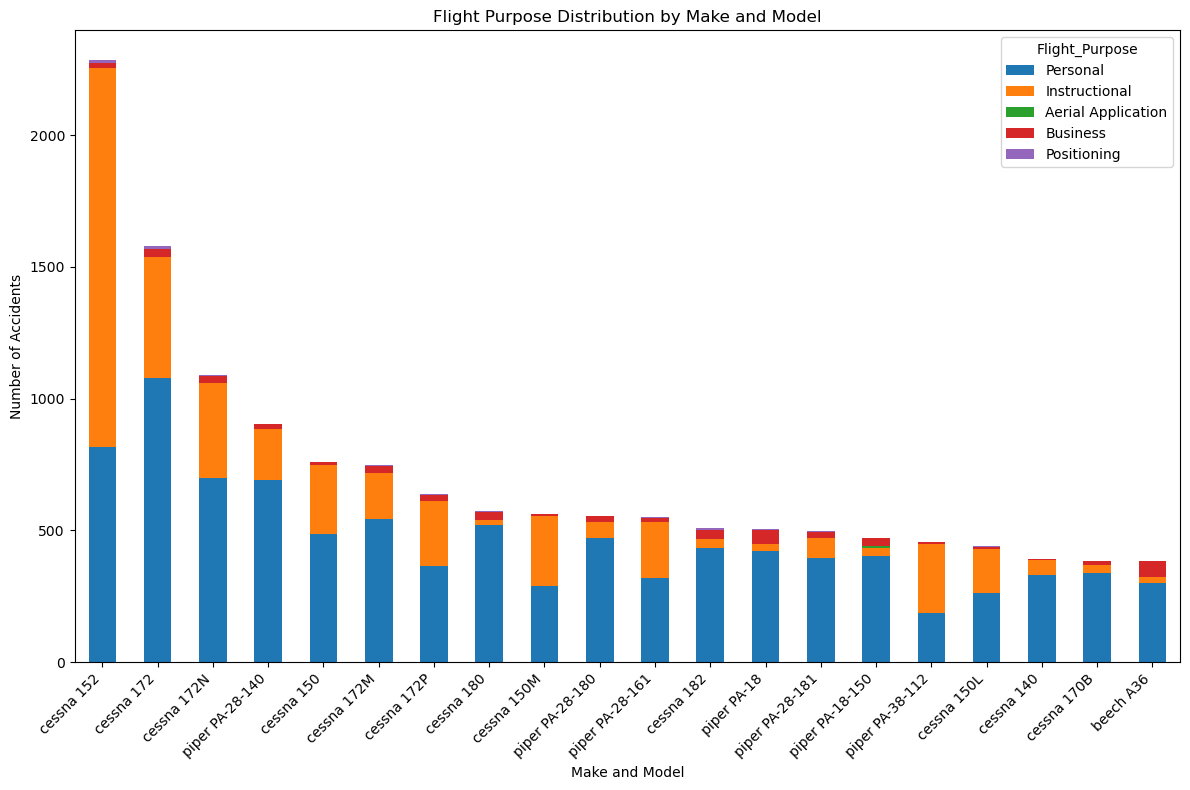

In [140]:

# Plotting and stacking the flightpurpose categories in a bar chart
fig, ax = plt.subplots(figsize=(12, 8))

make_model_flight_pivot_top[:20].plot(kind='bar', stacked=True, ax=ax, )

ax.set_xlabel('Make and Model')
ax.set_ylabel('Number of Accidents')
ax.set_title('Flight Purpose Distribution by Make and Model')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()

From the distribution, the CESSNA and PIPER that have been involved in most accidents while  Personal and Instructional use lead the flight purpose. 




### Lets investigate the aircraft damage and the make and model of the planes

In [141]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75073 entries, 0 to 88886
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Investigation_Type  75073 non-null  object        
 1   Event_Date          75073 non-null  datetime64[ns]
 2   Country             74955 non-null  object        
 3   Injury_Severity     75051 non-null  object        
 4   Aircraft_damage     75073 non-null  object        
 5   Make                75073 non-null  object        
 6   Model               75073 non-null  object        
 7   Amateur.Built       75044 non-null  object        
 8   Number_of_Engines   72823 non-null  float64       
 9   Engine.Type         71863 non-null  object        
 10  Flight_Purpose      75073 non-null  object        
 11  Fatal_Injuries      65356 non-null  float64       
 12  Serious_Injuries    64327 non-null  float64       
 13  Minor_Injuries      65005 non-null  float64       


In [142]:
# check mussing values
df_new['Aircraft_damage'].isna().sum()

0

In [143]:
# drop missing values
df_new = df_new[df_new['Aircraft_damage'].notna()]

In [144]:
df_new['Aircraft_damage'].value_counts()

Aircraft_damage
Substantial    58298
Destroyed      15750
Minor           1025
Name: count, dtype: int64

Unknown is taken as missing values so i drop the rows since its less than 1% of the data in the column 

In [145]:
df_new = df_new[~df_new['Aircraft_damage'].isin(['Unknown'])]
df_new['Aircraft_damage'].value_counts()

Aircraft_damage
Substantial    58298
Destroyed      15750
Minor           1025
Name: count, dtype: int64

In [146]:
make_model_damage = df_new.groupby(['Make', 'Model', 'Aircraft_damage']).size().reset_index(name='Count')
make_model_damage.head()

,Make,Model,Aircraft_damage,Count
0,107.5 flying corporation,One Design DR 107,Destroyed,1
1,177mf llc,PITTS MODEL 12,Substantial,1
2,1977 colfer-chan,STEEN SKYBOLT,Substantial,1
3,1st ftr gp,FOCKE-WULF 190,Destroyed,1
4,2000 mccoy,Genesis,Destroyed,1


In [147]:
make_model_damage['Make_model'] = make_model_damage['Make']+ ' '+ make_model_damage['Model']
make_model_damage

,Make,Model,Aircraft_damage,Count,Make_model
0,107.5 flying corporation,One Design DR 107,Destroyed,1,107.5 flying corporation One Design DR 107
1,177mf llc,PITTS MODEL 12,Substantial,1,177mf llc PITTS MODEL 12
2,1977 colfer-chan,STEEN SKYBOLT,Substantial,1,1977 colfer-chan STEEN SKYBOLT
3,1st ftr gp,FOCKE-WULF 190,Destroyed,1,1st ftr gp FOCKE-WULF 190
4,2000 mccoy,Genesis,Destroyed,1,2000 mccoy Genesis
...,...,...,...,...,...
18120,zubair s khan,RAVEN,Substantial,1,zubair s khan RAVEN
18121,zuber thomas p,ZUBER SUPER DRIFTER,Substantial,1,zuber thomas p ZUBER SUPER DRIFTER
18122,zukowski,EAA BIPLANE,Substantial,1,zukowski EAA BIPLANE
18123,zwart,KIT FOX VIXEN,Substantial,1,zwart KIT FOX VIXEN


In [148]:
make_model_damage_pivot = make_model_damage.pivot(index='Make_model', columns='Aircraft_damage', values='Count').fillna(0)
make_model_damage_pivot

Aircraft_damage,Destroyed,Minor,Substantial
Make_model,,,
107.5 flying corporation One Design DR 107,1.0,0.0,0.0
177mf llc PITTS MODEL 12,0.0,0.0,1.0
1977 colfer-chan STEEN SKYBOLT,0.0,0.0,1.0
1st ftr gp FOCKE-WULF 190,1.0,0.0,0.0
2000 mccoy Genesis,1.0,0.0,0.0
...,...,...,...
zubair s khan RAVEN,0.0,0.0,1.0
zuber thomas p ZUBER SUPER DRIFTER,0.0,0.0,1.0
zukowski EAA BIPLANE,0.0,0.0,1.0


In [149]:
# create total column to be able to sort values
make_model_damage_pivot['Total'] = make_model_damage_pivot.sum(axis=1)
make_model_damage_pivot = make_model_damage_pivot.sort_values(by='Total', ascending=False).drop(columns='Total')
make_model_damage_pivot

Aircraft_damage,Destroyed,Minor,Substantial
Make_model,,,
cessna 152,352.0,28.0,1935.0
cessna 172,178.0,8.0,1440.0
cessna 172N,225.0,7.0,893.0
piper PA-28-140,218.0,5.0,694.0
cessna 150,123.0,9.0,653.0
...,...,...,...
flurry AVENTURA II,0.0,0.0,1.0
fly baby 1-A,0.0,0.0,1.0
fly by sea co COMP AIR 1,0.0,0.0,1.0


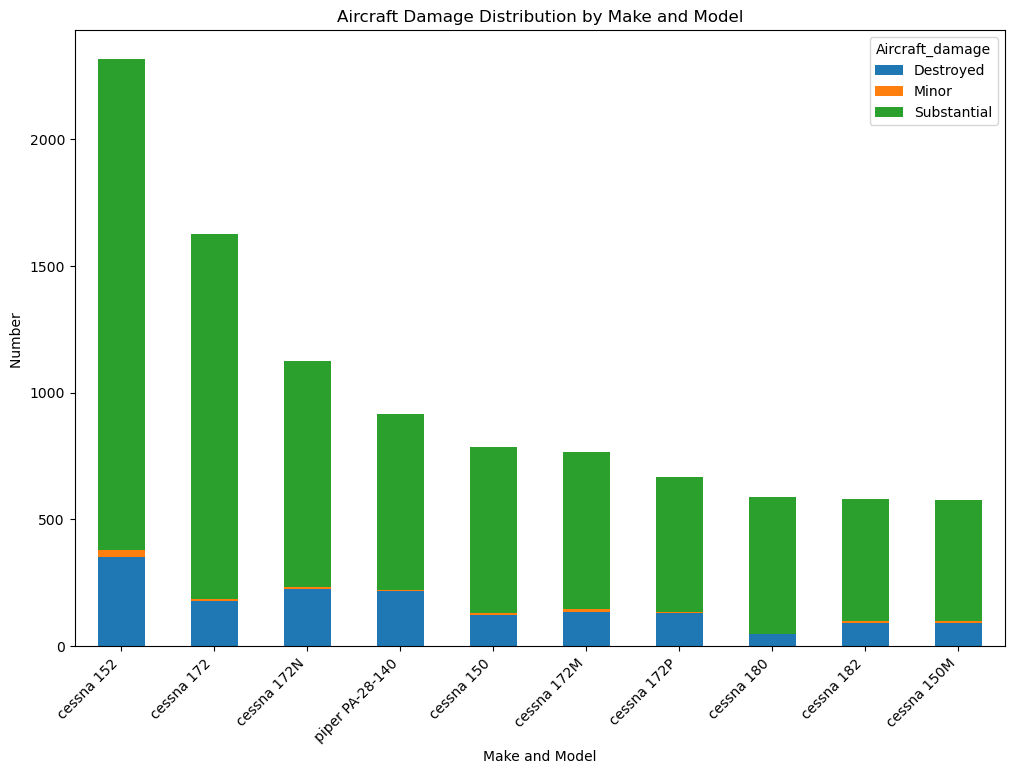

In [150]:
# plotting the pivot table using plot function
fig, ax = plt.subplots(figsize=(12,8))

make_model_damage_pivot[:10].plot(kind='bar',stacked=True, ax=ax,)
ax.set_title('Aircraft Damage Distribution by Make and Model')
ax.set_xlabel('Make and Model')
ax.set_ylabel('Number ')
plt.xticks(rotation=45, ha='right');

The Cessna suffered substantial damage more.

### Lets determine the aircraft make with less accidents and was used for business. 

In [97]:
make_business = df_new.groupby(['Make', 'Flight_Purpose']).size().reset_index(name='Count')
make_business_pivot = make_business.pivot(index='Make', columns='Flight_Purpose', values='Count').fillna(0)
mbusiness = make_business_pivot['Business'].reset_index(name='Count')
mbsort = mbusiness.sort_values(by='Count', ascending=False)
mbsort

,Make,Count
1175,cessna,1337.0
5010,piper,805.0
591,beech,476.0
605,bell,169.0
4524,mooney,97.0
...,...,...
2467,geide,0.0
2466,gefa-flug gmbh,0.0
2465,geertz,0.0
2464,geddes,0.0


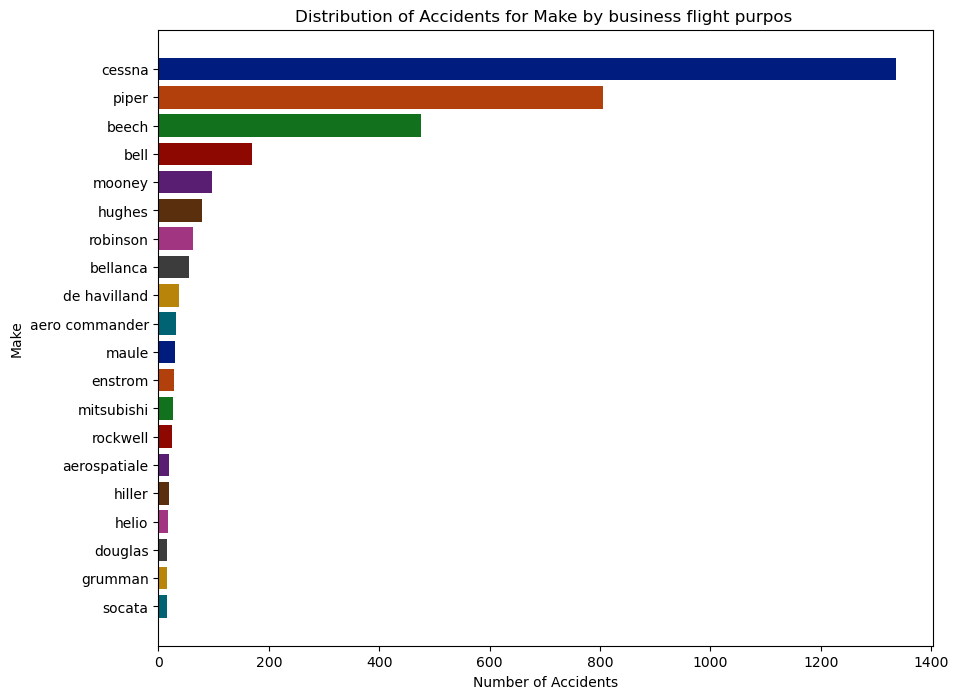

In [105]:
# plot the distribution of accidents for make and business flight purpose
# Determine what plane is good for business

fig, ax = plt.subplots(figsize=(10,8))


colors = sns.color_palette("dark", 20)
ax.barh(mbsort['Make'][:20], mbsort['Count'][:20], color=colors )
ax.set_xlabel('Number of Accidents')
ax.set_ylabel('Make')
ax.set_title('Distribution of Accidents for Make by business flight purpos ');
ax.invert_yaxis()

Cessna , Piper and Beech  have the most number of accidents for business purpose.

Largely attributed by the fact that it has been involved in many accidents. 

In [108]:
# lets calculate the least in the business category

In [151]:
mbsort_least = mbusiness.sort_values(by='Count')
len(mbsort_least[mbsort_least['Count'] == 0])


6950

In [ ]:
From the above Distinction we can see that alot of planes have less Accidents.  

In [69]:
make_model_business = 

,Make,Model,AccidentCount
15166,davenport,LONG EZ,1
5291,cessna,T303A,1
5290,piper,PA-J3C-65,1
5306,kolb company,TWIN STAR,1
5289,robinson,R22Beta,1
...,...,...,...
87,cessna,150,829
49,piper,PA-28-140,932
51,cessna,172N,1163
17,cessna,172,1753


### Lets looks at the Engine type that has had lowest accidents

In [163]:
df_new['Engine_Type'].value_counts()

Engine_Type
Reciprocating    65111
Turbo Shaft       2536
Turbo Prop        2142
Turbo Fan          434
Turbo Jet          260
Electric             9
LR                   1
Name: count, dtype: int64

UNK, NONE and Unknown are place holders for missing values. so i will just drop them.

In [161]:
df_new['Engine_Type'].isna().sum()

0

In [160]:
df_new = df_new[df_new['Engine_Type'].notna()]

In [162]:
df_new = df_new[~df_new['Engine_Type'].isin(['UNK', 'NONE', 'Unknown'])]

In [180]:
eng_accidents = df_new.groupby(['Engine_Type', 'Investigation_Type']).size().reset_index(name='Count')
eng_accidents = a[a['Investigation_Type'] == 'Accident']
eng_accidents.head()

,Engine_Type,Investigation_Type,Count
0,Electric,Accident,9
1,LR,Accident,1
2,Reciprocating,Accident,64773
4,Turbo Fan,Accident,371
6,Turbo Jet,Accident,246


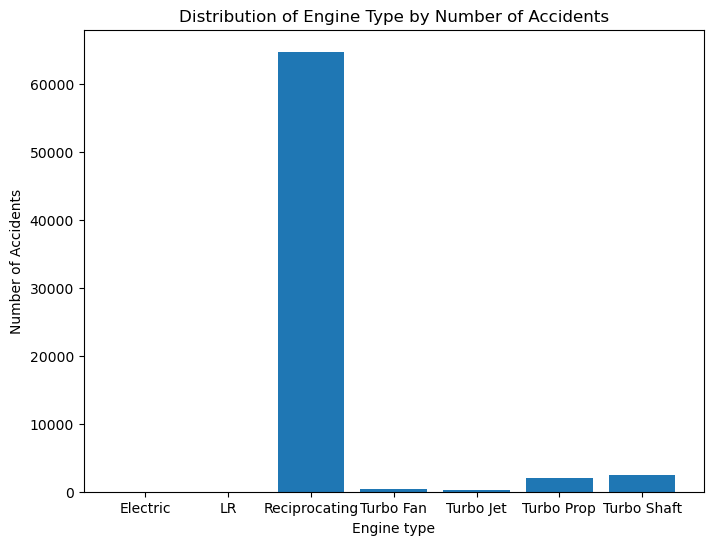

In [192]:
# plotting engine type and the number of accidents involved in 
fig, ax = plt.subplots(figsize=(8,6))

ax.bar(eng_accidents['Engine_Type'], eng_accidents['Count'])
ax.set_xlabel('Engine type')
ax.set_ylabel('Number of Accidents')
ax.set_title('Distribution of Engine Type by Number of Accidents');

Reciprocating engines are generally used for small aircrafts. Hence mostly used in CESSNA and Piper. This explains the high number of accidents

Turbo fan engines are used for commercial planes e.g Boeing 747, Boing 767. It is a good engine type to purchase. 
Turbo Jet engines offer high thrust and performance at high speeds, making them ideal for military and supersonic applications. 

For electric and LR engine, they are less common and have less data. 

Turbo jet and Turbo fan engines seem to be the best engine categories. 

In [170]:
eng

0                                            Reciprocating
1                                            Reciprocating
2                                            Reciprocating
3                                            Reciprocating
6                                            Reciprocating
                               ...                        
88647                                        Reciprocating
88661                                        Reciprocating
88735                                        Reciprocating
88767                                        Reciprocating
count    Engine_Type
Reciprocating                     ...
Name: Engine_Type, Length: 70494, dtype: object